--- SEMANTIC DENSITY RESULTS ---

Domain: Maritime (Fishing/Sea)
Total Unique Words: 947
Examples:
  - abrac: Old name for the baranggay in the western part of Bolinao where the British built a big light house on a hill overlooking the sea during ancient times.
  - adat: A biting bitter taste such as the taste of eggplant out of season and lacking water.
  - adurno: Decorations, usually to make something look more elegant like carved cabinets and jewelry.
  - agos: A body of water moving in a definite direction.
  - agrunumya: Agronomy , branch of agriculture which deals with crop production, soil and water management.

Domain: Agriculture (Rice/Farming)
Total Unique Words: 574
Examples:
  - a'lo: Pestle, a rounded piece of wood about five inches in diameter and six feet long used to pound or grind substances in a mortar or thresh rice in a trough.
  - a'song: A large wooden or stone bowl shaped mortar used with a pestle for pounding grains such as rice or corn.
  - abaka: Abaca, a ban

/tmp/ipython-input-3437579585.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="viridis")


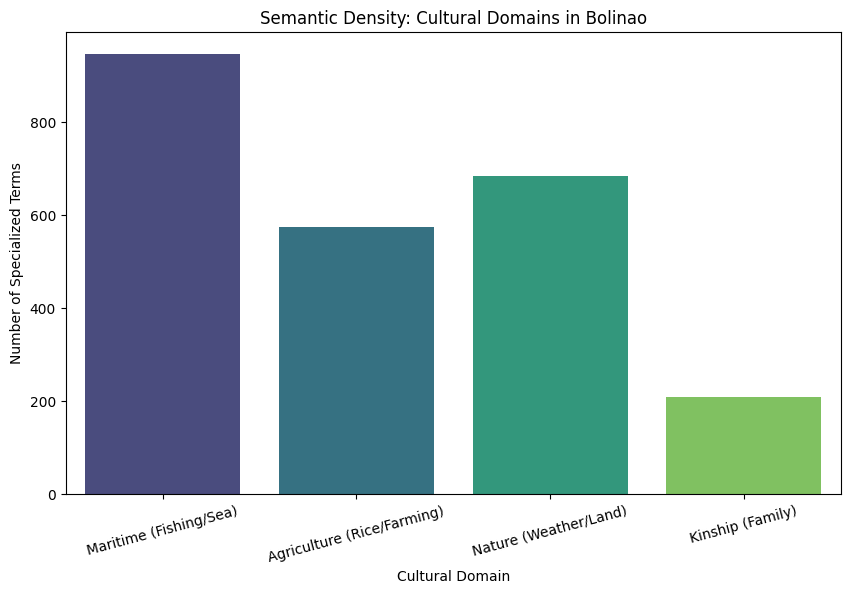

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Bolinao_Lexicon.csv", encoding='latin-1')
categories = {
    "Maritime (Fishing/Sea)": ["fish", "sea", "boat", "net", "water", "ocean", "swim", "catch", "marine", "reef"],
    "Agriculture (Rice/Farming)": ["rice", "farm", "plant", "harvest", "grain", "crop", "field", "husk", "plow"],
    "Nature (Weather/Land)": ["wind", "rain", "storm", "mountain", "sky", "cloud", "tree", "river", "forest", "animal"],
    "Kinship (Family)": ["mother", "father", "child", "brother", "sister", "aunt", "uncle", "cousin", "family", "grand"]
}
category_counts = {}
found_words = {}

for cat, keywords in categories.items():
    mask = df['meaning_english'].fillna('').str.lower().apply(lambda x: any(k in x for k in keywords))
    matches = df[mask]
    category_counts[cat] = len(matches)
    found_words[cat] = matches[['word', 'meaning_english']].head(5).values.tolist()

print("--- SEMANTIC DENSITY RESULTS ---")
for cat, count in category_counts.items():
    print(f"\nDomain: {cat}")
    print(f"Total Unique Words: {count}")
    print("Examples:")
    for w, m in found_words[cat]:
        print(f"  - {w}: {m}")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="viridis")
plt.title("Semantic Density: Cultural Domains in Bolinao")
plt.ylabel("Number of Specialized Terms")
plt.xlabel("Cultural Domain")
plt.xticks(rotation=15)
plt.show()